# Projet IA | FISA A5 Info 2022-2025
###### Christophe BOSSA, Nassim BOUTIKAR, Romain HUNTZINGER

Traitement des données pour vérifier s'il en manque



Importation des librairies


In [ ]:
import housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tarfile
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse éthique des données et impact sur le projet IA

## Contexte
L'entreprise **HumanForYou**, une entreprise pharmaceutique basée en Europe, souhaite analyser les facteurs influençant le taux de rotation de ses employés (attrition) et identifier des pistes d'amélioration pour limiter les départs. Pour ce faire, des données anonymisées des employés ont été mises à disposition afin de construire un modèle de prédiction de l'attrition.

Cependant, l'utilisation de ces données soulève des questions éthiques et légales, notamment en matière de respect de la vie privée et de protection des données personnelles. Cette section vise à analyser ces aspects et proposer une stratégie pour assurer une démarche éthique tout en maintenant la pertinence de l'analyse.

## Situation initiale:

### - Quel but ?

Le but est de réduire le taux de rotation élevé des employés (environ 15%) de l’entreprise pharmaceutique HumanForYou en identifiant les facteurs influençant ce taux et en proposant des pistes d’amélioration pour motiver les employés à rester.  

### - Quel contexte ?

HumanForYou est une entreprise pharmaceutique basée en Europe, employant environ 4000 personnes. Le taux de rotation actuel est considéré comme préjudiciable à l'entreprise en termes de retards de projets, de coûts de recrutement et de formation, ainsi que de perte de productivité


### - Quel problème ?

Le problème central est le taux de rotation élevé qui entraîne des conséquences négatives pour l'entreprise, notamment des retards dans les projets, des coûts supplémentaires en ressources humaines et une perte de temps et d'efficacité lors de l'intégration de nouveaux employés.

## Solution :

Analyser les données fournies par le service RH pour identifier les facteurs influençant le taux de rotation.

Développer des modèles prédictifs pour anticiper les départs potentiels.

Proposer des stratégies de rétention basées sur les résultats de l'analyse.

Mettre en place des programmes de développement professionnel et de formation continue.

Améliorer les conditions de travail et les avantages sociaux en fonction des facteurs identifiés.

## Parties prenantes :

### Qui est concerné ?
- Les employés actuels de HumanForYou

- La direction de l’entreprise

- Le service des ressources humaines

- Les clients et partenaires de l’entreprise

- Les nouveaux employés potentiels  

- Les analystes chargés du projet  

- Les anciens employés qui figurent dans les données

## Impacts :

### Quels avantages ?

- Réduction du taux de rotation et stabilisation de la main-d'œuvre

- Amélioration de la productivité et de l'efficacité opérationnelle

- Réduction des coûts liés au recrutement et à la formation

- Meilleure réputation de l'entreprise auprès des clients et partenaires

- Augmentation de la satisfaction et de l'engagement des employés

- Amélioration de la compétitivité de l'entreprise sur le marché du travail


### Quels inconvénients ?

- Risque de violation de la vie privée des employés lors de l'analyse des données personnelles

- Possibilité de créer un sentiment de surveillance ou de contrôle excessif

- Coûts initiaux pour la mise en place des solutions proposées

- Risque de discrimination involontaire si les modèles prédictifs ne sont pas correctement conçus

- Potentielle résistance au changement de la part de certains employés ou - managers

---



## Cadre légal : RGPD et CCPA
### **Réglement Général sur la Protection des Données (RGPD - UE)**
Le RGPD impose des obligations strictes concernant le traitement des données personnelles, y compris celles des employés. Parmi ses principes fondamentaux, on retrouve :
- **Consentement et transparence** : Les employés doivent être informés des données collectées, de leur utilisation et doivent pouvoir donner leur consentement.
- **Droit d'accès et de suppression** : Toute personne doit pouvoir accéder aux données la concernant et demander leur suppression.
- **Minimisation des données** : Seules les données strictement nécessaires doivent être collectées.
- **Sécurité et pseudonymisation** : Les données doivent être stockées de manière sécurisée et, si possible, pseudonymisées pour limiter l'identification directe.

### **California Consumer Privacy Act (CCPA - USA)**
Bien que ce projet concerne une entreprise Européenne, il est utile d'examiner le CCPA, qui impose des règles similaires :
- **Droit à la connaissance et à la suppression** des données personnelles.
- **Obligation pour les entreprises de limiter la collecte et l'utilisation des données.**
- **Protection des consommateurs contre l'utilisation abusive des données.**

Ainsi, bien que l'entreprise ne soit pas directement soumise à ces lois, il est éthique et pertinent d'en tenir compte pour garantir une démarche responsable.

---

## Identification des données sensibles
Dans les fichiers fournis, certaines colonnes peuvent être considérées comme sensibles selon les principes du RGPD et du CCPA :
- **Données personnelles sensibles** :
  - **Genre** (Gender) : L'utilisation du genre peut conduire à des discriminations dans les analyses, en favorisant ou défavorisant certains groupes.
  - **Statut marital** (MaritalStatus) : Ce facteur peut indirectement influencer les décisions liées aux salaires, promotions ou autres traitements différenciés.
  - **Âge** (Age) : L'âge peut être un critère de discrimination, notamment en ce qui concerne les opportunités de carrière et l'ancienneté dans l'entreprise.
  - **Salaire mensuel** (MonthlyIncome) : Le revenu est une information hautement confidentielle qui peut induire des biais sur les décisions de gestion.
  - **Distance du domicile** (DistanceFromHome) : Une corrélation peut être faite avec la disponibilité et l'assiduité des employés, ce qui peut être perçu comme discriminatoire.
- **Données liées à la performance** :
  - **Niveau de performance** (PerformanceRating) : Cette information peut être utilisée de manière biaisée pour des décisions de rétention ou de licenciement.
  - **Engagement au travail** (JobInvolvement) : Un faible engagement peut être mal interprété et utilisé contre certains employés sans un cadre d'analyse approprié.
- **Données liées à la qualité de vie** :
  - **Satisfaction de l'environnement de travail** (EnvironmentSatisfaction) : Une mauvaise satisfaction peut entraîner des préjugés contre les employés dans les décisions RH.
  - **Équilibre vie professionnelle - vie privée** (WorkLifeBalance) : L'évaluation de cet aspect peut impacter la perception du sérieux et de l'implication d'un employé, menant à des traitements inéquitables.

Certaines de ces données peuvent entraîner des biais ou être perçues comme discriminatoires si elles sont utilisées directement pour prédire l'attrition.

---

## Approche éthique et stratégie d'analyse
Afin d'évaluer l'impact éthique des données, nous proposons trois versions du modèle :

1. **Modèle "full éthique"** : Suppression de toutes les données sensibles identifiées pour garantir un traitement impartial des employés.
2. **Modèle "sans restriction"** : Utilisation de toutes les données fournies, permettant une comparaison avec la version éthique.
3. **Modèle "semi-éthique"** :
   - Pseudonymisation des données sensibles lorsque possible.
   - Suppression des variables les plus sensibles (comme le genre et le statut marital) pour réduire les risques de discrimination.
   - Conservation d'autres variables (ex : WorkLifeBalance) avec un cadre d'analyse éthique.

Ce processus permettra de comparer les performances des modèles et d'évaluer l'impact de la suppression des données sensibles.

---
## Renforcement des sanctions et engagement éthique

L'entreprise HumanForYou s'engage à appliquer des sanctions strictes en cas de non-respect des règles éthiques et des réglementations en vigueur. Toute violation des principes de confidentialité des données entraînera des mesures disciplinaires pouvant aller jusqu'à des sanctions légales et des licenciements.

Nous réaffirmons notre engagement envers une intelligence artificielle éthique, qui respecte les droits des employés et garantit une utilisation responsable des données. En outre, un dialogue constant avec les employés sera mis en place afin d'écouter leurs préoccupations et d'améliorer continuellement nos pratiques en matière de protection des données et d’équité algorithmique.

---

**Voici un petit récapitulatif de l'anonymisation selon la CNIL:**

Comment vérifier l’efficacité de l’anonymisation ?
Les autorités de protection des données européennes définissent trois critères qui permettent de s’assurer qu’un jeu de données est véritablement anonyme :

**l’individualisation** : il ne doit pas être possible d’isoler un individu dans le jeu de données ;

Exemple : une base de données de CV où seuls les nom et prénoms d’une personne auront été remplacés par un numéro (qui ne correspond qu’à elle) permet d’individualiser cette personne. Dans ce cas, cette base de données est considérée comme pseudonymisée et non comme anonymisée.

**la corrélation** : il ne doit pas être possible de relier entre eux des ensembles de données distincts concernant un même individu ;

Exemple : une base de données cartographique renseignant les adresses de domiciles de particuliers ne peut être considérée comme anonyme si d’autres bases de données, existantes par ailleurs, contiennent ces mêmes adresses avec d’autres données permettant d’identifier les individus.

**l’inférence** : il ne doit pas être possible de déduire, de façon quasi certaine, de nouvelles informations sur un individu.

Exemple : si un jeu de données supposément anonyme contient des informations sur le montant des impôts de personnes ayant répondu à un questionnaire, que tous les hommes ayant entre 20 et 25 ans qui ont répondu sont non imposables, il sera possible de déduire, si on sait que M. X, homme âgé de 24 ans, a répondu au questionnaire, que ce dernier est non imposable.

---

**Conclusion**

L'éthique dans l'utilisation des données employés est un enjeu majeur, notamment dans un contexte où l'IA peut amplifier des biais existants. Le respect du RGPD est d'autant plus crucial que l'Europe impose des réglementations strictes pour protéger la vie privée et prévenir les abus liés aux données personnelles. La confidentialité et la sécurité des informations sont devenues une priorité majeure, et le risque de fuite de données peut avoir des conséquences graves tant sur le plan légal que sur la réputation de l'entreprise.

L'anonymisation des données joue un rôle essentiel dans cette démarche en permettant d'utiliser les informations sans compromettre l'identité des employés. Elle réduit les risques d'exploitation abusive des données et garantit une conformité accrue aux réglementations en vigueur. En nous appuyant sur les principes du RGPD et du CCPA, nous avons identifié les données sensibles et proposé une stratégie en trois versions pour concilier performance et respect de l'éthique. Cette approche assure une analyse responsable et limite les biais, tout en permettant une évaluation pragmatique des résultats obtenus.

Ainsi, en lien avec les sept exigences recommandées par la Commission Européenne :

Respect de l'autonomie humaine : Les employés sont informés sur l'utilisation de leurs données et peuvent exercer leurs droits.

Robustesse technique et sécurité : L'anonymisation et la pseudonymisation garantissent la sécurité des informations.

Confidentialité et gouvernance des données : Les mesures strictes de protection des données assurent la conformité avec le RGPD.

Transparence : Une communication claire est mise en place pour informer les employés sur les modèles et leur impact.

Diversité, non-discrimination et équité : La suppression et la pseudonymisation des données sensibles préviennent les biais discriminatoires.

Bien-être environnemental et sociétal : La prise en compte des conditions de travail et de la satisfaction des employés garantit un usage responsable de l'IA.

Responsabilité : L'entreprise s'engage activement à faire respecter ces principes et à appliquer des sanctions en cas de non-conformité.

Notre démarche vise ainsi à aligner les objectifs de l'entreprise avec une utilisation éthique et équitable de l'intelligence artificielle, en protégeant à la fois les droits des employés et la fiabilité des modèles prédictifs.

Extraction du/des fichiers


In [ ]:
file_path_general = 'general_data.csv'
file_path_employee ='employee_survey_data.csv'
file_path_manager = 'manager_survey_data.csv'
file_path_in = 'in_time.csv'
file_path_out = 'out_time.csv'

directory= "Data\\"

# Charger le dataset
general_data = pd.read_csv(directory + file_path_general)
employee_data = pd.read_csv(directory + file_path_employee)
managers_data = pd.read_csv(directory + file_path_manager)
in_data = pd.read_csv(directory + file_path_in)
out_data = pd.read_csv(directory + file_path_out)


in_data.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
out_data.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

#general_data.info()

#general_data.describe()


general_data.head()




,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
employee_data.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
managers_data.head()


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
in_data.head()


,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [ ]:
in_data.info()

numerical_in_columns = in_data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_in_columns:
    print(f"\nColonne: {column}")
    print(in_data[column].head())
    print(f"Type de données: {in_data[column].dtype}")
    print(f"Valeurs uniques: {in_data[column].nunique()}")
    print(f"Moyenne: {in_data[column].mean():.2f}")
    print(f"Écart-type: {in_data[column].std():.2f}")
    print(f"Min: {in_data[column].min()}")
    print(f"Max: {in_data[column].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB

Colonne: EmployeeID
0    1
1    2
2    3
3    4
4    5
Name: EmployeeID, dtype: int64
Type de données: int64
Valeurs uniques: 4410
Moyenne: 2205.50
Écart-type: 1273.20
Min: 1
Max: 4410

Colonne: 2015-01-01
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2015-01-01, dtype: float64
Type de données: float64
Valeurs uniques: 0
Moyenne: nan
Écart-type: nan
Min: nan
Max: nan

Colonne: 2015-01-14
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2015-01-14, dtype: float64
Type de données: float64
Valeurs uniques: 0
Moyenne: nan
Écart-type: nan
Min: nan
Max: nan

Colonne: 2015-01-26
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2015-01-26, dtype: float64
Type de données: float64
Valeurs uniques: 0
Moyenne: nan
Écart-type: nan
Min: nan
Max: nan

Colonne: 2015-03-05
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2015-0

In [ ]:
out_data.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [ ]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## Conversion pour les In et Out

In [ ]:
# Assurer la converison datetime (gérer les valeurs "NaN")
in_data_n = in_data.drop('EmployeeID', axis=1).apply(pd.to_datetime, errors='coerce')
out_data_n = out_data.drop('EmployeeID', axis=1).apply(pd.to_datetime, errors='coerce')

worked_hours = (out_data_n - in_data_n).map(lambda x: x.total_seconds() / 3600 if pd.notnull(x) else None)

mean_worked_hours = pd.DataFrame()
mean_worked_hours['EmployeeID'] = in_data['EmployeeID']
mean_worked_hours['MeanWorkedHours'] = worked_hours.mean(axis=1)

# Afficher les valeurs uniques pour comprendre le contenu de la colonne
print(mean_worked_hours['MeanWorkedHours'].unique())

# Identifier les valeurs problématiques
problematic_values = mean_worked_hours[pd.to_numeric(mean_worked_hours['MeanWorkedHours'], errors='coerce').isna()]['MeanWorkedHours']
print("Valeurs problématiques:", problematic_values)

# Nettoyer les données si nécessaire
# Par exemple, remplacer les chaînes vides par NaN
mean_worked_hours['MeanWorkedHours'] = mean_worked_hours['MeanWorkedHours'].replace('', np.nan)

# Puis convertir en float
mean_worked_hours['MeanWorkedHours'] = mean_worked_hours['MeanWorkedHours'].astype(float)

# Calculer le temps moyen de travail par employé
mean_worked_hours['MeanInTime'] = in_data_n.apply(lambda row:
                                                  row.dt.hour.mean() + row.dt.minute.mean() / 60 if not row.empty else None,
                                                  axis=1
                                                  )
in_data_n['EmployeeID'] = in_data['EmployeeID']

merged_time = in_data_n.merge(out_data, on='EmployeeID', how='outer').merge(mean_worked_hours, on='EmployeeID', how='outer')
print("Type de MeanWorkedHours:", mean_worked_hours['MeanWorkedHours'].dtype)
print("Type de MeanInTime:", mean_worked_hours['MeanInTime'].dtype)


[7.373650622605362 7.718968926553678 7.013240358126724 ...
 7.7066317941317966 9.492594513600737 6.988947557471264]
Valeurs problématiques: Series([], Name: MeanWorkedHours, dtype: object)
Type de MeanWorkedHours: float64
Type de MeanInTime: float64


## Fusion des dataframe par EmployeeID


In [ ]:
# Fusionner tous les DataFrames sur EmployeeID
merged_data = general_data.merge(employee_data, on='EmployeeID', how='outer') \
    .merge(managers_data, on='EmployeeID', how='outer') \
    .merge(mean_worked_hours, on='EmployeeID', how='outer')



In [ ]:
merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkedHours,MeanInTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,0,0,3.0,4.0,2.0,3,3,7.373651,9.993032
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,5,1,4,3.0,2.0,4.0,2,4,7.718969,9.980720
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,0,3,2.0,2.0,1.0,3,3,7.013240,10.016598
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,7,5,4.0,4.0,3.0,2,3,7.193678,9.973830
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,6,0,4,4.0,1.0,3.0,3,3,8.006175,9.990068


## Vérification du nombre de valeur nulle par colonne


In [ ]:

null_value = merged_data.isnull().sum()
null_value_manager = managers_data.isnull().sum()
null_value_employee = employee_data.isnull().sum()
null_value_in = in_data.isnull().sum()
null_value_out = out_data.isnull().sum()

print(null_value)
#print(null_value_manager)
#print(null_value_employee)
#print(null_value_in)
#print(null_value_out)


Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
MeanWorkedHours             0
MeanInTime                  0
dtype: int64


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## Remplissage des valeurs numériques manquantes par la valeure médianne


## Encodage des variables catégorielles

In [ ]:
########################################
# PRELIMINARY: Same imports & objects
########################################
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

le = LabelEncoder()
onehot = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Just an example: your user-specified columns
categorical_columns = ["BusinessTravel", "Department", "EducationField", "JobRole", "Gender","MaritalStatus"]
target_column = "Attrition"
drop_columns_always = ["Over18", "EmployeeCount", "StandardHours"]  # Irrelevant or constant

########################################
# FUNCTION TO BUILD (X, Y) EASILY
########################################
def build_XY(
    data,
    cat_cols,
    target_col,
    drop_cols_constant=None,
    columns_to_remove=None
):
    """
    Build a dataset (X, Y) based on your specific encoding steps.

    Parameters
    ----------
    data : pd.DataFrame
        The merged DataFrame containing your raw features.
    cat_cols : list of str
        Categorical columns to be OneHotEncoded.
    target_col : str
        Name of the target column (e.g., "Attrition").
    drop_cols_constant : list of str, optional
        Columns to always drop because they're useless or constant
        (e.g., Over18, EmployeeCount, StandardHours).
    columns_to_remove : list of str, optional
        Extra columns you want to remove (for ethical or other reasons).

    Returns
    -------
    X : pd.DataFrame
        Final features after dropping specified columns and applying
        label encoding & one-hot encoding on categoricals.
    Y : np.ndarray
        Numpy array of the label-encoded target.
    """
    if drop_cols_constant is None:
        drop_cols_constant = []
    if columns_to_remove is None:
        columns_to_remove = []

    # Make a copy to avoid changing the original
    df = data.copy()

    # 1) Remove the extra columns (e.g. 'unethical' columns)
    #    plus the 'always drop' ones
    cols_to_drop = list(set(columns_to_remove + drop_cols_constant))
    df.drop(columns=cols_to_drop, errors='ignore', inplace=True)

    # 2) Extract and encode the target
    Y = le.fit_transform(df[target_col])
    df.drop(columns=[target_col], inplace=True)

    # 3) OneHotEncode the chosen categorical columns
    encoded_categorical = onehot.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(
        encoded_categorical,
        columns=onehot.get_feature_names_out(cat_cols),
        index=df.index
    )

    # 4) Drop the original categorical columns from df
    df.drop(columns=cat_cols, inplace=True)

    # 5) Concatenate the encoded categorical back
    X = pd.concat([df, encoded_df], axis=1)

    # (Optional) You could also scale your numeric features here if you want,
    # but typically you'd do that after splitting into train/test sets.
    #
    # Example (commented out):
    # numeric_cols = X.select_dtypes(include=[np.number]).columns
    # X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    return X, Y

In [ ]:
non_ethical_columns_to_remove = []

X_non_ethical, Y_non_ethical = build_XY(
    data=merged_data,
    cat_cols=categorical_columns,
    target_col=target_column,
    drop_cols_constant=drop_columns_always,
    columns_to_remove=non_ethical_columns_to_remove
)

X_non_ethical

In [ ]:
sensitive_columns = ["Gender","MaritalStatus","Age","DistanceFromHome"]

X_ethical, Y_ethical = build_XY(
    data=merged_data,
    cat_cols=[x for x in categorical_columns if x not in sensitive_columns],
    target_col=target_column,
    drop_cols_constant=drop_columns_always,
    columns_to_remove=sensitive_columns
)

X_ethical

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def prepare_data_for_modeling(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    imputation_strategy="median"
):

    # 1) Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state
    )

    # Identify numeric columns to impute/scale
    numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns

    # 2) Impute missing values on numeric columns (train => fit, test => transform)
    imputer = SimpleImputer(strategy=imputation_strategy)
    X_train_num = imputer.fit_transform(X_train[numeric_cols])
    X_test_num = imputer.transform(X_test[numeric_cols])

    # 3) Scale the numeric columns
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled = scaler.transform(X_test_num)

    # Reconstruct train/test with scaled numeric columns
    # We need to keep the original OHE columns as well.
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Put the scaled numeric arrays back in place
    X_train_scaled[numeric_cols] = X_train_num_scaled
    X_test_scaled[numeric_cols] = X_test_num_scaled

    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
# 1) NON-ETHICAL
X_train_ne, X_test_ne, y_train_ne, y_test_ne = prepare_data_for_modeling(
    X_non_ethical,
    Y_non_ethical,
    test_size=0.2,
    random_state=42,
    imputation_strategy="median"
)
print("Non-Ethical train shape:", X_train_ne.shape, "test shape:", X_test_ne.shape)

# 2) ETHICAL
X_train_e, X_test_e, y_train_e, y_test_e = prepare_data_for_modeling(
    X_ethical,
    Y_ethical,
    test_size=0.2,
    random_state=42,
    imputation_strategy="median"
)
print("Ethical train shape:", X_train_e.shape, "test shape:", X_test_e.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

############################################################
# HELPER FUNCTIONS FOR TRAINING AND EVALUATION
############################################################

def train_and_evaluate_logistic_regression(
    X_train, X_test, y_train, y_test
):
    """
    Train a default Logistic Regression model and evaluate
    performance (Accuracy, Confusion Matrix, Classification Report, AUC-ROC).
    """
    # 1) Initialize and train
    logreg = LogisticRegression(random_state=42, max_iter=1000)
    logreg.fit(X_train, y_train)

    # 2) Predict
    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]

    # 3) Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print("===== Logistic Regression Results =====")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"AUC-ROC  : {auc_roc:.4f}")
    print("\nClassification Report :\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title("Logistic Regression - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}", color="blue")
    plt.plot([0,1],[0,1], linestyle='--', color="gray", label="Random (AUC=0.50)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Logistic Regression - ROC Curve")
    plt.legend()
    plt.show()

    # Return the model if needed
    return logreg


def train_and_evaluate_random_forest(
    X_train, X_test, y_train, y_test
):
    """
    Train a default Random Forest model and evaluate
    performance (Accuracy, Confusion Matrix, Classification Report, AUC-ROC).
    """
    # 1) Initialize and train
    rf = RandomForestClassifier(random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)

    # 2) Predict
    y_pred = rf.predict(X_test)
    y_pred_proba = rf.predict_proba(X_test)[:, 1]

    # 3) Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print("===== Random Forest Results =====")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"AUC-ROC  : {auc_roc:.4f}")
    print("\nClassification Report :\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title("Random Forest - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}", color="green")
    plt.plot([0,1],[0,1], linestyle='--', color="gray", label="Random (AUC=0.50)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest - ROC Curve")
    plt.legend()
    plt.show()

    return rf

In [ ]:
############################################################
# 3.1) NON-ETHICAL MODELING
############################################################

print("====== NON-ETHICAL DATASET ======\n")

# 1) Train/Eval: Logistic Regression
model_ne_logreg = train_and_evaluate_logistic_regression(
    X_train_ne, X_test_ne, y_train_ne, y_test_ne
)

# 2) Train/Eval: Random Forest
model_ne_rf = train_and_evaluate_random_forest(
    X_train_ne, X_test_ne, y_train_ne, y_test_ne
)


############################################################
# 3.2) ETHICAL MODELING
############################################################

print("====== ETHICAL DATASET ======\n")

# 1) Train/Eval: Logistic Regression
model_e_logreg = train_and_evaluate_logistic_regression(
    X_train_e, X_test_e, y_train_e, y_test_e
)

# 2) Train/Eval: Random Forest
model_e_rf = train_and_evaluate_random_forest(
    X_train_e, X_test_e, y_train_e, y_test_e
)


In [ ]:
from sklearn.model_selection import GridSearchCV

def hyperparam_tune_logistic_regression(X_train, y_train):
    """
    Perform a grid search for LogisticRegression hyperparams and return the best estimator.
    """
    # Define the parameter grid:
    # Note: 'l1' requires solver='saga'. 'l2' can use 'lbfgs' or 'saga'.
    # We'll do a small grid for demonstration:
    param_grid = {
        'solver': ['lbfgs', 'saga'],
        'max_iter': [100,200,500],  # or ['l1','l2'] if you want to test both
        'C': [0.01, 0.1, 1, 10]
    }

    logreg = LogisticRegression(random_state=42, penalty='l2')
    grid_search = GridSearchCV(
        estimator=logreg,
        param_grid=param_grid,
        cv=5,            # 5-fold cross-validation
        scoring='roc_auc',   # or 'accuracy', etc.
        n_jobs=-1         # Use all CPU cores if possible
    )

    grid_search.fit(X_train, y_train)

    print("===== Logistic Regression Hyperparam Tuning =====")
    print("Best Params :", grid_search.best_params_)
    print("Best AUC    :", grid_search.best_score_)

    best_logreg = grid_search.best_estimator_
    return best_logreg

############################################################
# Usage Example for the Non-Ethical dataset
############################################################

best_logreg_ne = hyperparam_tune_logistic_regression(X_train_ne, y_train_ne)

# Evaluate on the test set
print("Test score with best LR model (Non-Ethical):")
print("AUC-ROC =", roc_auc_score(y_test_ne, best_logreg_ne.predict_proba(X_test_ne)[:, 1]))
print("ACC     =", accuracy_score(y_test_ne, best_logreg_ne.predict(X_test_ne)))

best_logreg_e = hyperparam_tune_logistic_regression(X_train_e, y_train_e)

# Evaluate on the test set
print("Test score with best LR model (Ethical):")
print("AUC-ROC =", roc_auc_score(y_test_e, best_logreg_e.predict_proba(X_test_e)[:, 1]))
print("ACC     =", accuracy_score(y_test_e, best_logreg_e.predict(X_test_e)))

In [ ]:
def hyperparam_tune_random_forest(X_train, y_train):
    """
    Perform a grid search for RandomForest hyperparams and return the best estimator.
    """
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 10],
        'criterion': ['gini', 'entropy']
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,              # 5-fold cross-validation
        scoring='roc_auc', # or 'accuracy', etc.
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    print("===== Random Forest Hyperparam Tuning =====")
    print("Best Params :", grid_search.best_params_)
    print("Best AUC    :", grid_search.best_score_)

    best_rf = grid_search.best_estimator_
    return best_rf

############################################################
# Usage Example for the Non-Ethical dataset
############################################################

best_rf_ne = hyperparam_tune_random_forest(X_train_ne, y_train_ne)

print("Test score with best RF model (Non-Ethical):")
print("AUC-ROC =", roc_auc_score(y_test_ne, best_rf_ne.predict_proba(X_test_ne)[:, 1]))
print("ACC     =", accuracy_score(y_test_ne, best_rf_ne.predict(X_test_ne)))

############################################################
# Usage Example for the Ethical dataset
############################################################

best_rf_e = hyperparam_tune_random_forest(X_train_e, y_train_e)

print("Test score with best RF model (Ethical):")
print("AUC-ROC =", roc_auc_score(y_test_e, best_rf_e.predict_proba(X_test_e)[:, 1]))
print("ACC     =", accuracy_score(y_test_e, best_rf_e.predict(X_test_e)))


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

le=LabelEncoder()
onehot = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# On utilise l'encoder pour n'avoir que des valeurs numériques dans nos données
categorical_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
target_column = "Attrition"
drop_column = ["Over18", "EmployeeCount", "StandardHours"]

# Encodage
Y = le.fit_transform(merged_data[target_column])
encoded_categorical = onehot.fit_transform(merged_data[categorical_columns])

# Convertir en DataFrame avec les noms de colonnes corrects
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot.get_feature_names_out(categorical_columns))
# Suppression des colonnes catégorielles (avant l'encodage) + colonne que nous voulons prédire + colonne inutile
X = merged_data.drop(columns=categorical_columns + [target_column] + drop_column)

# Concaténation des nouvelles colonnes
X = pd.concat([X, encoded_categorical_df], axis=1)


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,1,131160,1.0,11,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,31,10,1,2,1,41890,0.0,23,1,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,32,17,4,3,4,193280,1.0,15,3,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,38,2,5,4,3,83210,3.0,11,3,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,10,1,5,1,23420,4.0,12,2,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,4406,1,60290,3.0,17,1,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4406,29,2,4,4407,1,26790,2.0,15,0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4407,25,25,2,4408,2,37020,0.0,20,0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4408,42,18,2,4409,1,23980,0.0,14,1,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


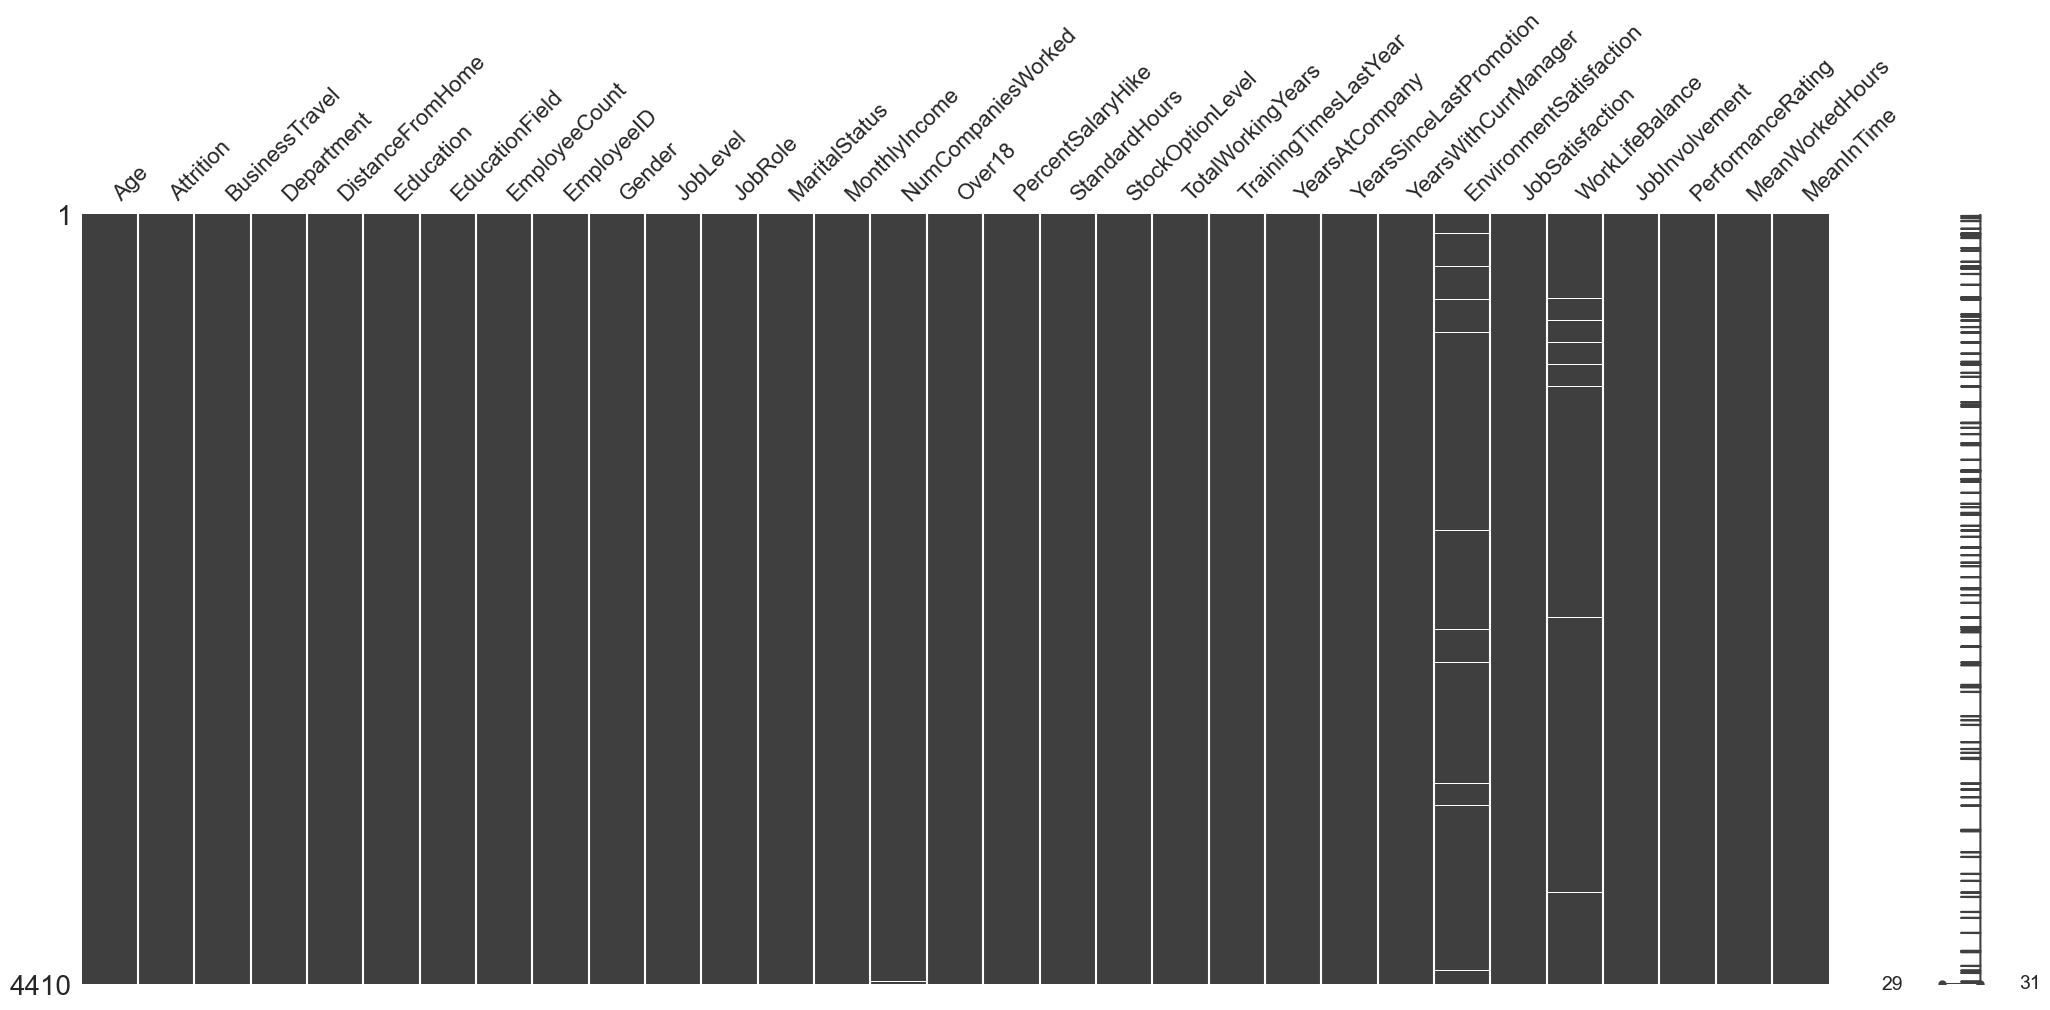

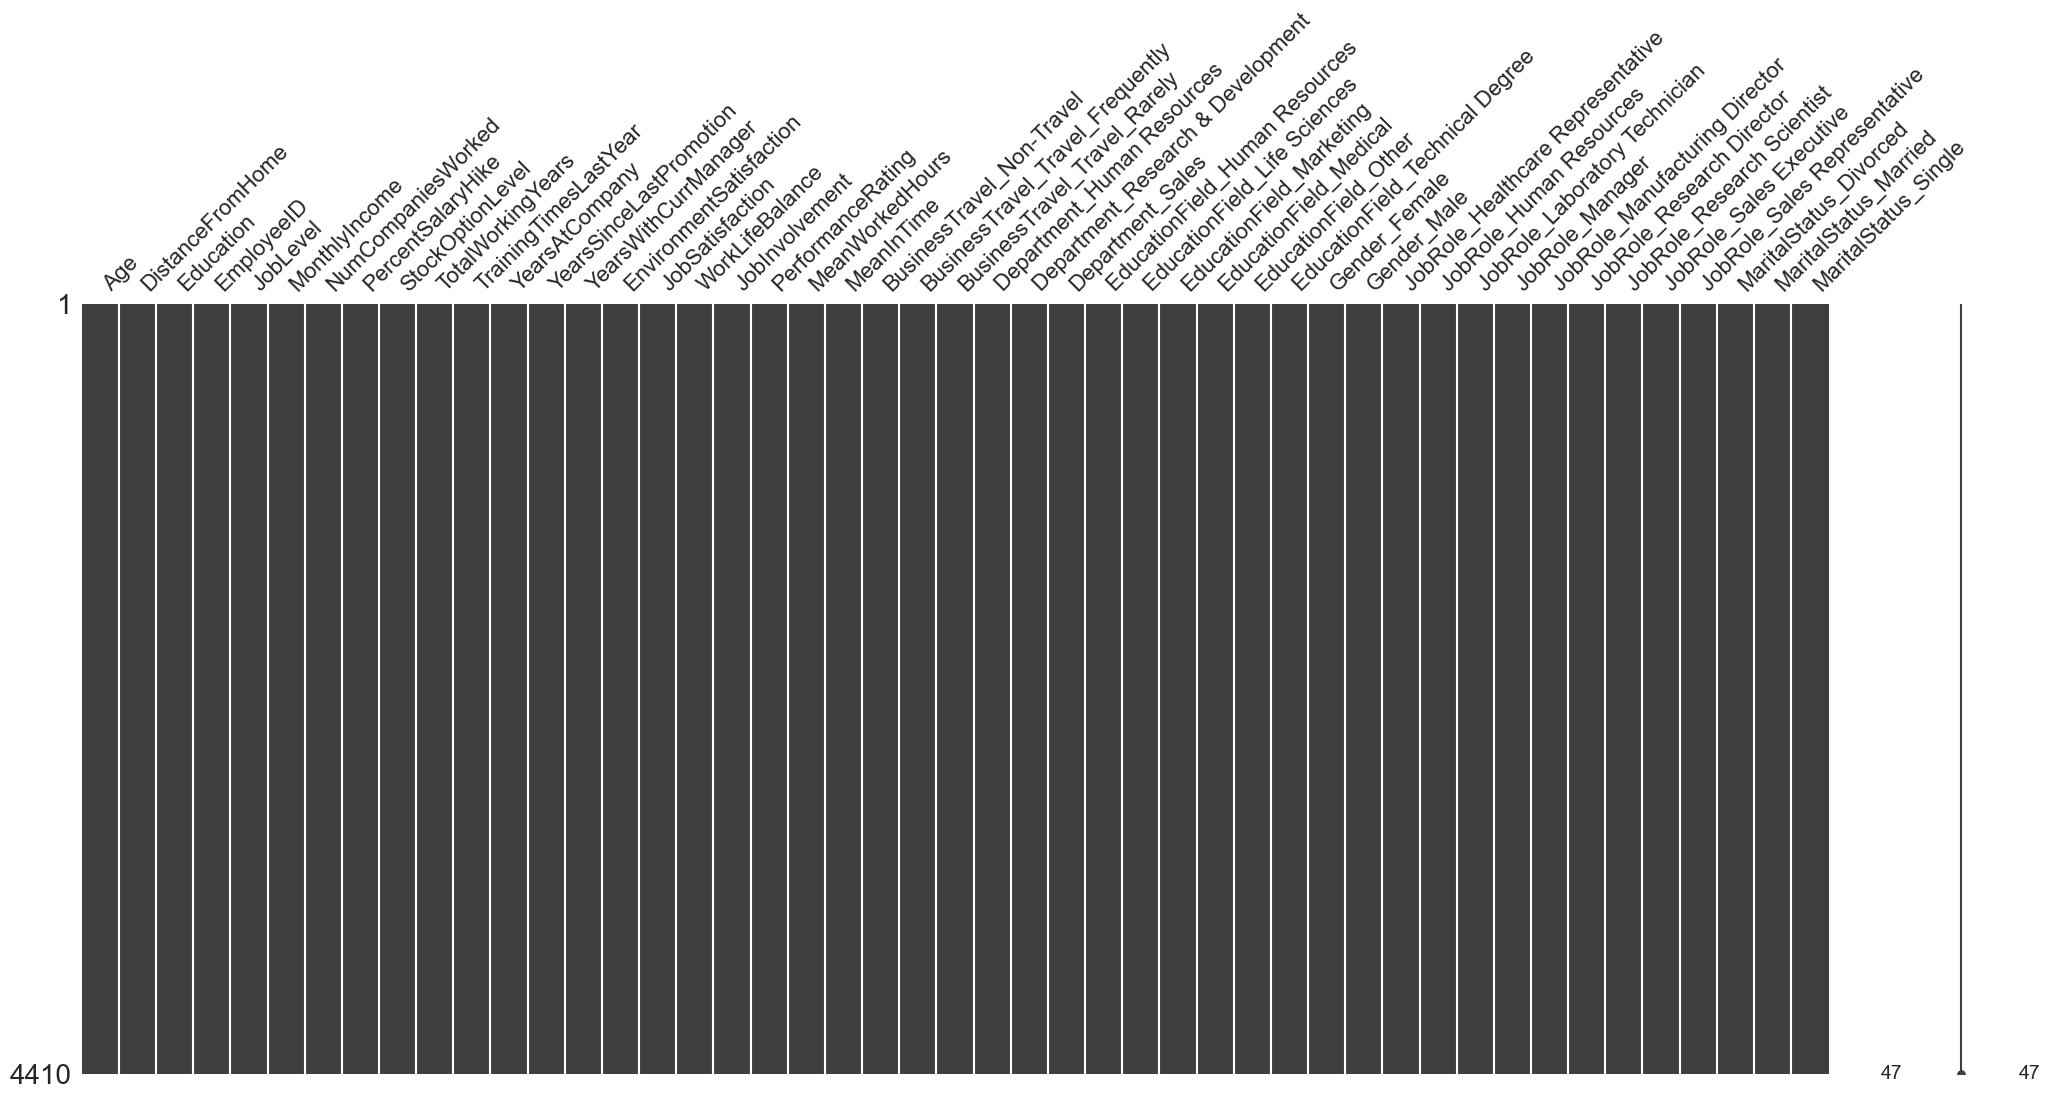

In [ ]:
import missingno as msno

# Visualisation des données manquantes
msno.matrix(merged_data)
plt.show()

# Imputation des valeurs manquantes
# Pour les colonnes numériques, utilisation de l'imputation mediane
numerical_columns = X.select_dtypes(include=['float64', 'int64'])
#merged_data[numerical_columns] = merged_data[numerical_columns].fillna(merged_data[numerical_columns].median())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Remplacement des valeurs manquantes en utilisant fit_transform()
X_imputed = pd.DataFrame(imputer.fit_transform(numerical_columns), columns=numerical_columns.columns)

# Mise à jour du DataFrame original
X[numerical_columns.columns] = X_imputed

# Visualisation des données manquantes
msno.matrix(X)
plt.show()


## Normalisation des données

In [ ]:
# Normalisation des colonnes numériques
scaler = StandardScaler()

merged_data_num_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# Vérification de la normalisation
merged_data_num_scaled.head()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.541369,-0.393938,-0.891688,-1.731658,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1,-0.648668,0.099639,-1.868426,-1.730873,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
2,-0.539166,0.963398,1.061787,-1.730087,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565
3,0.117845,-0.887515,2.038524,-1.729302,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,-0.539166,0.099639,-1.868426,-1.728516,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650


# Visualisation des données

## Analyse avec HISPLOT


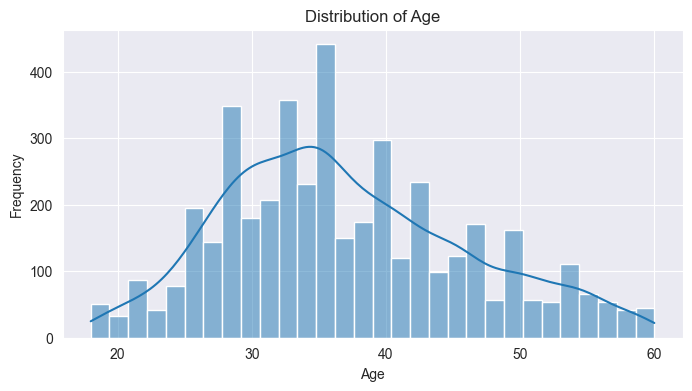

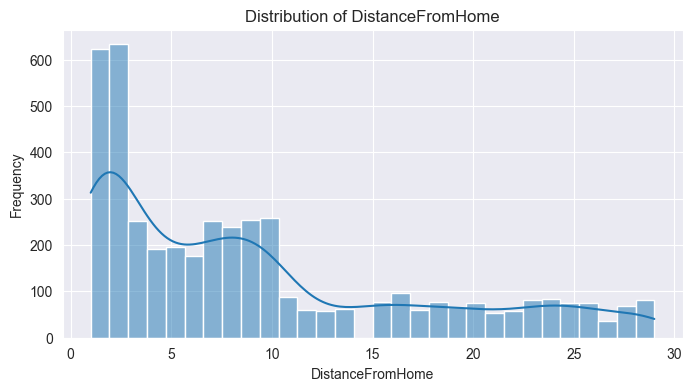

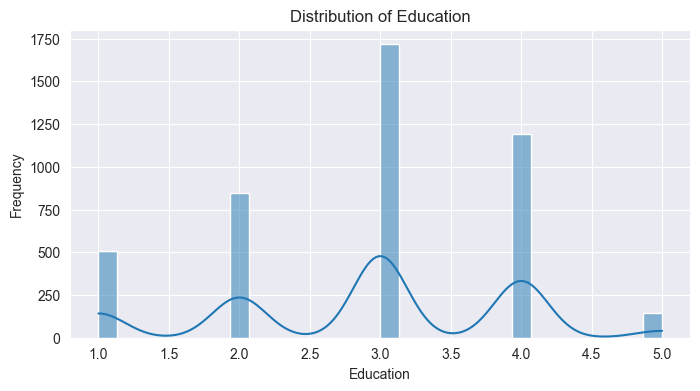

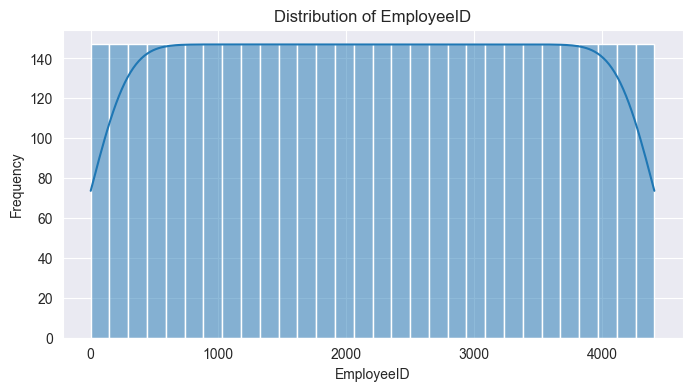

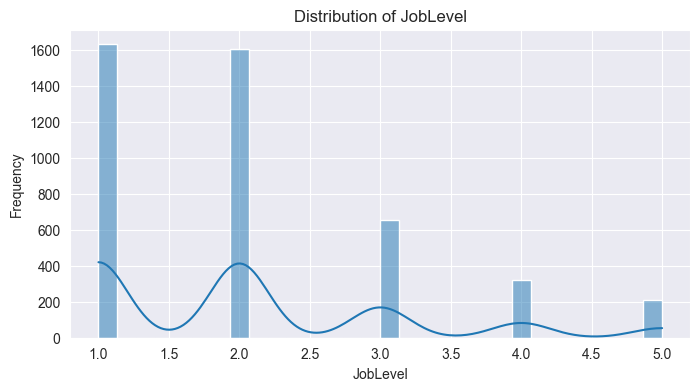

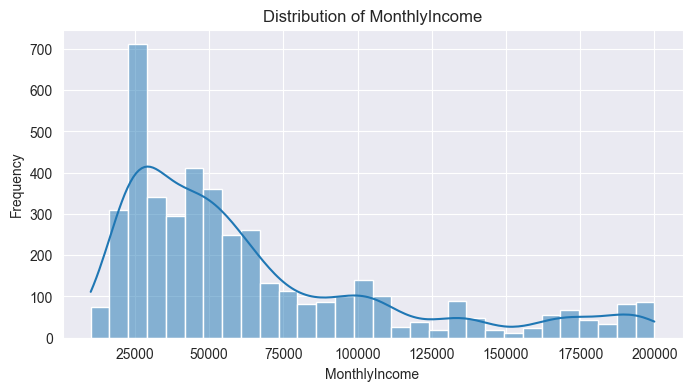

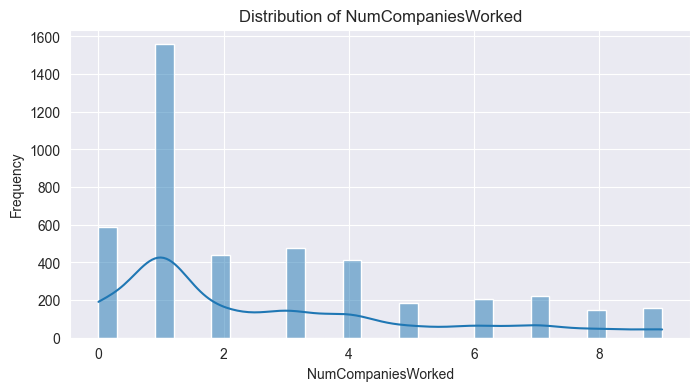

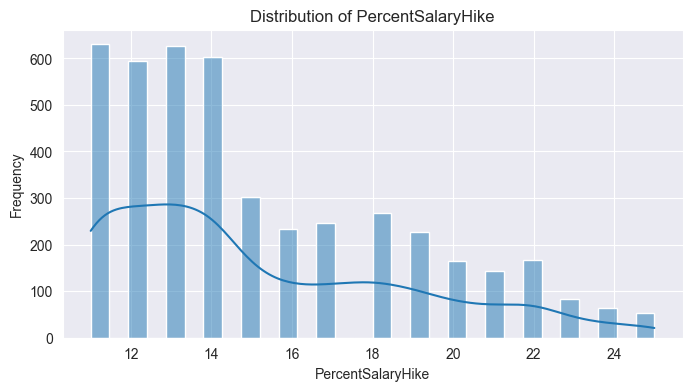

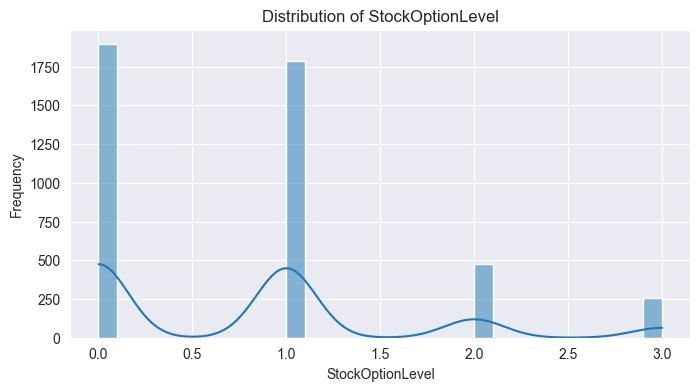

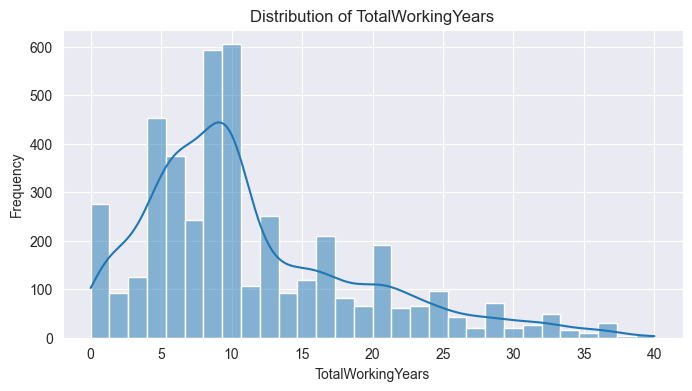

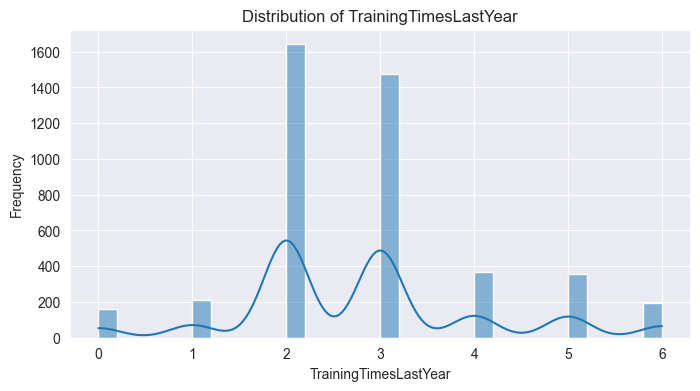

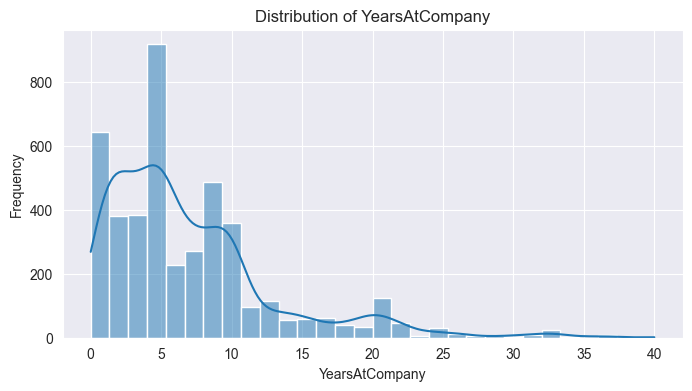

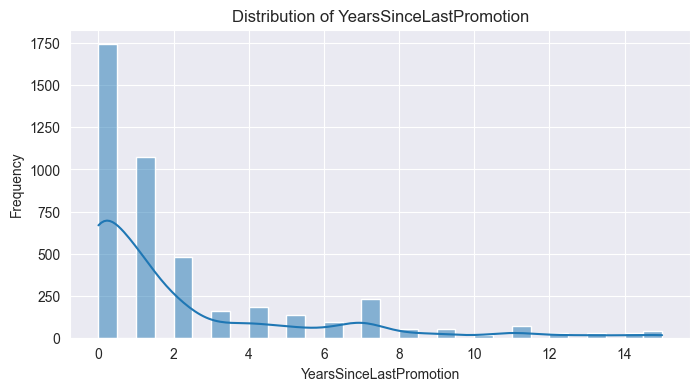

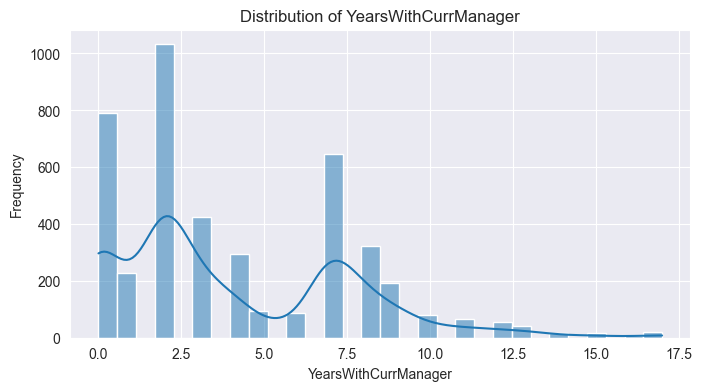

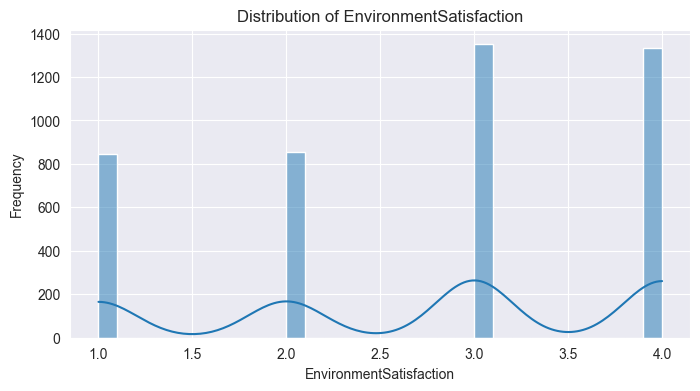

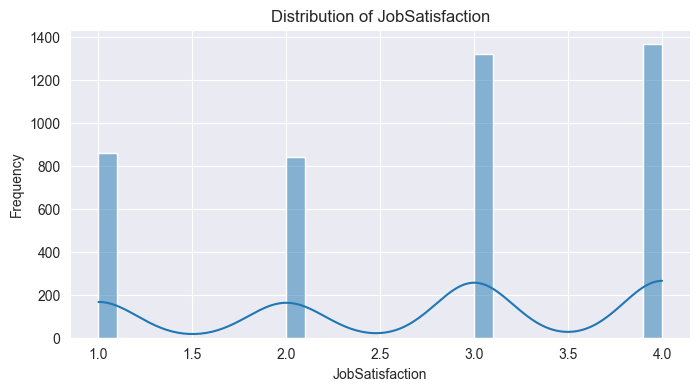

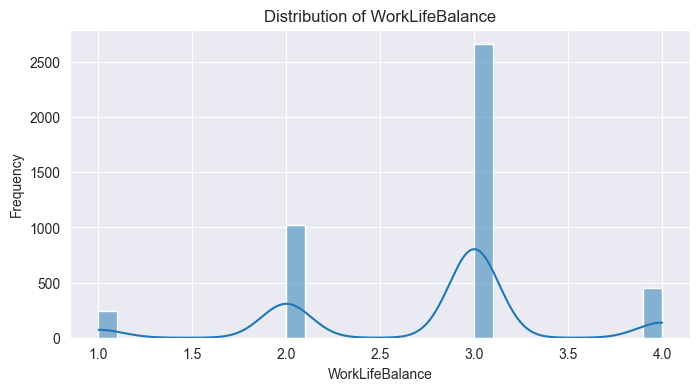

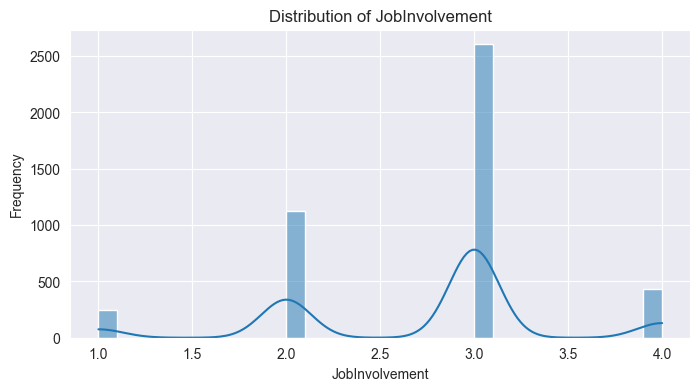

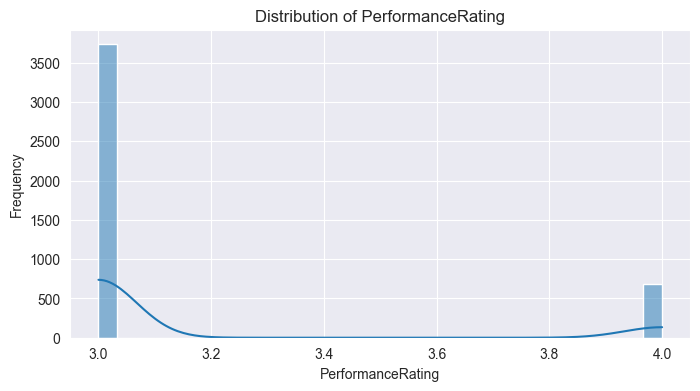

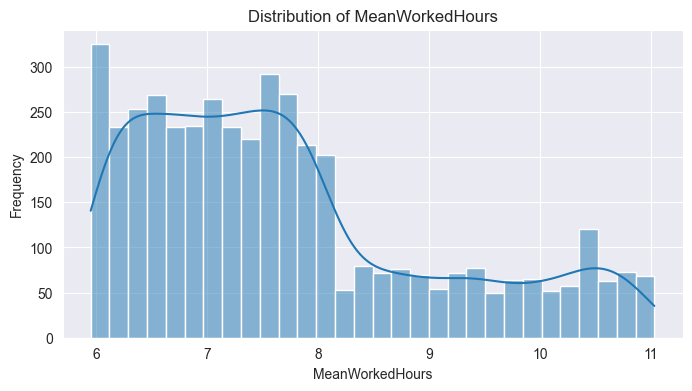

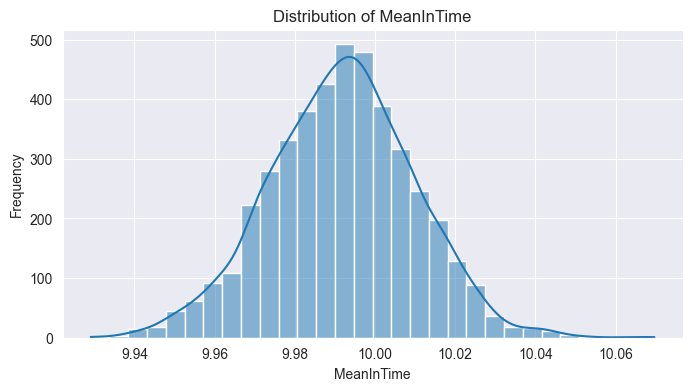

KeyError: 'BusinessTravel_Non-Travel'

<Figure size 800x400 with 0 Axes>

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numerical_columns[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()





In [ ]:
null_value = merged_data.isnull().sum()

print(null_value)

## Matrice de corrélation


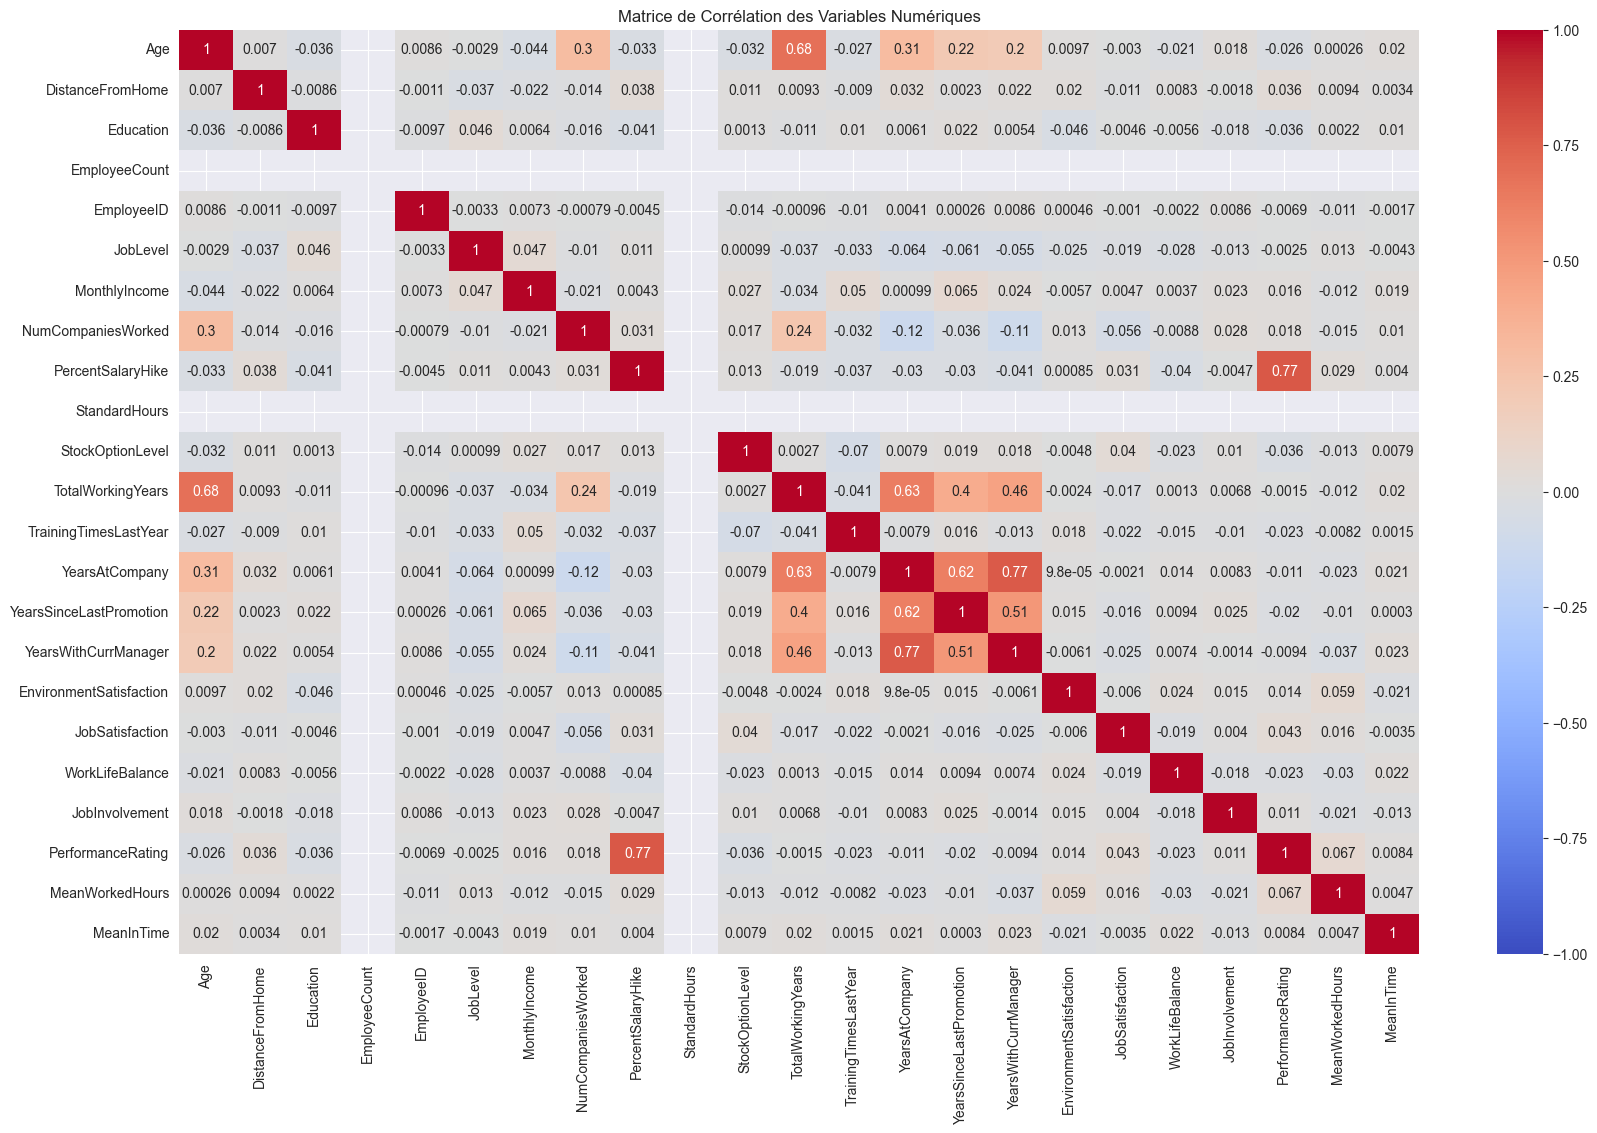

In [ ]:
corr_matrix = merged_data_num_scaled.corr()

plt.figure(figsize=(20, 12))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


#### 1. Précision (Accuracy)
La précision est le ratio du nombre de prédictions correctes sur le nombre total de prédictions.

$
\text{Précision} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}
$

#### 2. Précision (Precision)
La précision est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses positives (FP).

$
\text{Précision} = \frac{VP}{VP + FP}
$

# Préparation des données d'apprentissage et de test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Régression logistique
#### Formulation Mathématique

La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$\sigma(z) = \frac{1}{1 + e^{-z}}$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Où :
- $\beta_0$ est l'ordonnée à l'origine (intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ sont les coefficients des caractéristiques $x_1, x_2, \ldots, x_n $

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Fonction de Coût

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Où :
- $m$ est le nombre d'échantillons
- $y^{(i)}$ est la valeur réelle pour l'échantillon $i$
- $\hat{y}^{(i)}$ est la probabilité prédite pour l'échantillon $i$

#### Entraînement du Modèle

L'entraînement du modèle de régression logistique consiste à trouver les paramètres $\beta$ qui minimisent la fonction de coût. Ceci est généralement fait à l'aide de l'algorithme de descente de gradient.

In [ ]:


# Standardize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform (not fit_transform) for test data

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

coeff_matrix = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_matrix["AbsCoefficient"] = coeff_matrix["Coefficient"].abs()
coeff_matrix = coeff_matrix.sort_values(by="AbsCoefficient", ascending=False)
print(coeff_matrix)
coeff_matrix.to_csv("coefficient_matrix.csv", index=False)


y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

                              Feature  Coefficient  AbsCoefficient
9                   TotalWorkingYears    -0.641879        0.641879
13               YearsWithCurrManager    -0.615589        0.615589
19                    MeanWorkedHours     0.614268        0.614268
12            YearsSinceLastPromotion     0.509306        0.509306
15                    JobSatisfaction    -0.482322        0.482322
14            EnvironmentSatisfaction    -0.409941        0.409941
6                  NumCompaniesWorked     0.348212        0.348212
46               MaritalStatus_Single     0.334705        0.334705
0                                 Age    -0.303295        0.303295
22   BusinessTravel_Travel_Frequently     0.253457        0.253457
10              TrainingTimesLastYear    -0.233177        0.233177
21          BusinessTravel_Non-Travel    -0.228165        0.228165
16                    WorkLifeBalance    -0.220885        0.220885
44             MaritalStatus_Divorced    -0.207754        0.20

## Matrice de confusion



La matrice de confusion est une méthode de visualisation de la performance d'un modèle de classification. Elle affiche les résultats sous forme de tableau, avec les prédictions réelles et prédites. Ses composants sont :

- **Vraies Positives (VP)** : Nombre de fois où la classe positive a été correctement prédite.
- **Fausses Positives (FP)** : Nombre de fois où la classe négative a été incorrectement prédite comme positive.
- **Vraies Négatives (VN)** : Nombre de fois où la classe négative a été correctement prédite.
- **Fausses Négatives (FN)** : Nombre de fois où la classe positive a été incorrectement prédite comme négative.

$
\begin{array}{|c|c|c|}
\hline
& \text{Prédite Positive} & \text{Prédite Négative} \\
\hline
\text{Réelle Positive} & \text{VP} & \text{FN} \\
\hline
\text{Réelle Négative} & \text{FP} & \text{VN} \\
\hline
\end{array}
$

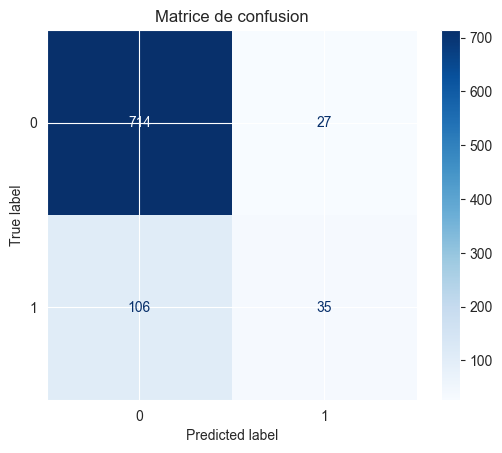

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)


# Visualisation de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Rapport de classification

#### 1. Précision (Accuracy)
La précision est le ratio du nombre de prédictions correctes sur le nombre total de prédictions.

$
\text{Précision} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}
$

#### 2. Précision (Precision)
La précision est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses positives (FP).

$
\text{Précision} = \frac{VP}{VP + FP}
$

#### 3. Rappel (Recall)
Le rappel est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses négatives (FN).

$
\text{Rappel} = \frac{VP}{VP + FN}
$

#### 4. F1-Score
Le F1-score est la moyenne harmonique de la précision et du rappel, offrant un équilibre entre les deux.

$
\text{F1-Score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$

In [ ]:
# Rapport de classification
class_report = classification_report(y_test, y_pred)
print("\nRapport de classification :")
print(class_report)


Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       741
           1       0.56      0.25      0.34       141

    accuracy                           0.85       882
   macro avg       0.72      0.61      0.63       882
weighted avg       0.82      0.85      0.82       882



# Calcul AUC-ROC


AUC-ROC : 0.7757


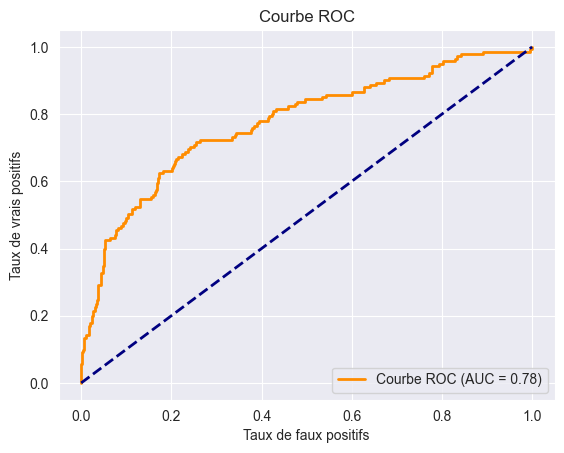

In [ ]:
# Calcul AUC-ROC
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
auc_score_regression = roc_auc_score(y_test, y_pred_proba)
auc_score_regression2 = roc_auc_score(y_test, y_pred)
print(f"\nAUC-ROC : {auc_score_regression:.4f}")
print(f"\nAUC-ROC : {auc_score_regression2:.4f}")

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {auc_score_regression:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC-ROC scores: {cv_scores}")
print(f"Mean CV AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Arbre de décision

Les arbres de décision sont des modèles de prédiction qui utilisent une structure d'arbre pour prendre des décisions basées sur des règles dérivées des caractéristiques des données. Ils sont largement utilisés pour les tâches de classification et de régression en raison de leur simplicité et de leur interprétabilité.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  RocCurveDisplay

# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)


# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Visualisation de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree,
                              display_labels=tree_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Random Forest")
plt.show()

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)


# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Calcul de l'AUC-ROC
auc_score_tree = roc_auc_score(y_test, y_proba_tree)
print("AUC-ROC (Decision Tree) :\n", auc_score_tree)


# Affichage de la courbe ROC avec intégration automatique de l'AUC
roc_display = RocCurveDisplay.from_estimator(
    tree_model,
    X_test,  # Utiliser X_test_scaled seulement si preprocessing inclus dans le modèle
    y_test,
    name="Arbre de décision",
    color="blue"
)

# Ajout de la ligne de référence aléatoire
plt.plot([0, 1], [0, 1], linestyle='--', label='Aléatoire (AUC = 0.5)', color='darkorange')

# Personnalisation du graphique
plt.title(f'Courbe ROC - AUC={auc_score_tree:.3f}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

tree_features_coeff = pd.DataFrame({'feature': X.columns, 'importance': tree_model.feature_importances_})
tree_features_coeff = tree_features_coeff.sort_values('importance', ascending=False)
print("\nTop 10 features (Decision tree):")
print(tree_features_coeff.head(10))

# Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC-ROC scores: {cv_scores}")
print(f"Mean CV AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Random Forest


Les arbres de décision sont des modèles de prédiction qui utilisent une structure d'arbre pour prendre des décisions basées sur des règles dérivées des caractéristiques des données. Ils sont largement utilisés pour les tâches de classification et de régression en raison de leur simplicité et de leur interprétabilité. Une forêt aléatoire est constituée de nombreux arbres de décision indépendants, chacun construit sur un échantillon aléatoire des données d'entraînement et utilisant un sous-ensemble aléatoire des caractéristiques pour chaque division de l'arbre. Les prédictions de tous les arbres sont ensuite combinées pour produire une seule prédiction finale.

In [ ]:
# Importations nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             roc_auc_score,
                             RocCurveDisplay,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# Initialisation et entraînement du modèle
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model_rf.predict(X_test_scaled)
y_proba = model_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Visualisation de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Random Forest")
plt.show()

# Rapport de classification
#print("\nRapport de classification :")
#//print(classification_report(y_test, y_pred))

# Calcul AUC-ROC
auc_score = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC random forest : {auc_score:.4f}")

# Courbe ROC
RocCurveDisplay.from_estimator(model_rf, X_test_scaled, y_test)
plt.title('Courbe ROC - Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Aléatoire (AUC = 0.5)')
plt.legend()
plt.show()

# Importance des caractéristiques
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportance des caractéristiques :")
print(feature_importances.head(10))


# Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC-ROC scores: {cv_scores}")
print(f"Mean CV AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Perceptron

Le perceptron est l'un des algorithmes de classification supervisée les plus simples et les plus anciens, introduit par Frank Rosenblatt en 1957. C'est une unité de traitement élémentaire d'un réseau de neurones, souvent utilisée pour les tâches de classification binaire. Le perceptron est basé sur une combinaison linéaire des caractéristiques d'entrée et utilise une fonction de seuil pour produire une sortie binaire.

#### Formulation Mathématique

Le perceptron calcule une somme pondérée des caractéristiques d'entrée et applique une fonction de seuil pour déterminer la classe prédite.

La sortie du perceptron est définie comme suit :
$\hat{y} = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases} $

Où :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Ici, $\beta_0$ est le biais (ou l'ordonnée à l'origine), et $\beta_1, \beta_2, \ldots, \beta_n$ sont les poids des caractéristiques $x_1, x_2, \ldots, x_n$.

#### Algorithme d'Apprentissage

L'algorithme d'apprentissage du perceptron ajuste les poids en fonction des erreurs de classification. Pour chaque échantillon d'entraînement $(x^{(i)}, y^{(i)})$, où $y^{(i)}$ est la classe réelle :

1. Calculer la sortie prédite :
$\hat{y}^{(i)} = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}$

2. Mettre à jour les poids si la prédiction est incorrecte :
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$
Où $\eta$ est le taux d'apprentissage.


Le perceptron n'a pas de fonction coût

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialisation et entraînement du modèle Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Visualisation de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_perceptron, display_labels=perceptron.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Perceptron")
plt.show()

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron, zero_division=0)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# Calcul AUC-ROC
y_scores_perceptron = perceptron.decision_function(X_test)
roc_auc_perceptron = roc_auc_score(y_test, y_scores_perceptron)
print(f"AUC-ROC (Perceptron) : {roc_auc_perceptron:.4f}")

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_scores_perceptron)
plt.figure()
plt.plot(fpr_perceptron, tpr_perceptron, color='darkorange', lw=2,
         label=f'Courbe ROC (AUC = {roc_auc_perceptron:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label="Aléatoire (AUC = 0.5)")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Perceptron")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(perceptron, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC-ROC scores: {cv_scores}")
print(f"Mean CV AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

In [ ]:
print("AUC-ROC random forest: ",auc_score)
print("AUC-ROC régression: ",auc_score_regression)
print("AUC-ROC decision tree",auc_score_tree)

On se rend compte que le decision Tree et le random forest sont plus efficace que les autres algorithmes :

1. Decision Tree : Simplicité et Interprétabilité
- Structure hiérarchique : Les arbres de décision divisent les données en fonction des caractéristiques les plus discriminantes, ce qui les rend simples à comprendre et interpréter.
- Adaptation aux données : Ils s'adaptent bien aux relations non linéaires entre les variables.
- Rapidité : Les arbres de décision sont rapides à entraîner, surtout pour des ensembles de données de petite ou moyenne taille.
Cependant, un arbre de décision unique peut être sujet à l'overfitting (surapprentissage), ce qui limite parfois son efficacité.
2. Random Forest : Robustesse et Précision
Le Random Forest améliore les arbres de décision en combinant plusieurs arbres pour réduire leurs faiblesses. Voici ses avantages :
- a. Réduction de l'Overfitting

En agrégeant les prédictions de plusieurs arbres (bagging), le Random Forest diminue la variance, ce qui réduit le risque d'overfitting observé avec un seul arbre.
- b. Robustesse aux données bruitées
Chaque arbre est formé sur un sous-échantillon aléatoire des données et utilise une sélection aléatoire des caractéristiques, ce qui le rend résistant aux anomalies ou au bruit.
- c. Performance sur des données complexes
-
Le Random Forest fonctionne bien avec des relations non linéaires entre les variables.
Il est robuste aux déséquilibres entre classes grâce à sa capacité à pondérer les erreurs.

- d. Importance des caractéristiques
Le Random Forest permet d'évaluer l'importance relative des caractéristiques, ce qui est utile pour comprendre quelles variables influencent le plus les prédictions.


## Bibliographie :


---

### Livres


*   Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and
 TensorFlow. O'Reilly Media.
*   Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.
*   Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.

### Tutoriels en ligne


*   Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
*   Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and Statistical Modeling with Python.
*   Brownlee, J. (2020). How to Develop a Random Forest Model in Python. Machine Learning Mastery.
*   Machine Lernia – Chaîne YouTube francophone spécialisée en machine learning et intelligence artificielle, avec des tutoriels sur Scikit-Learn, Random Forest et la régression linéaire.
        

### Documentation et ressources officielles


*   Scikit-learn : https://scikit-learn.org/stable/
*   Statsmodels : https://www.statsmodels.org/stable/
*   Matplotlib & Seaborn (Visualisation) : https://matplotlib.org/, https://seaborn.pydata.org/

